In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
boston = pd.read_csv("D:/datasets/Airbnb/calendar.csv")

In [3]:
boston.isnull().sum()

listing_id         0
date               0
available          0
price         665853
dtype: int64

In [4]:
boston.dropna(inplace=True)

In [5]:
boston

,listing_id,date,available,price
365,3075044,2017-08-22,t,$65.00
366,3075044,2017-08-21,t,$65.00
367,3075044,2017-08-20,t,$65.00
368,3075044,2017-08-19,t,$75.00
369,3075044,2017-08-18,t,$75.00
...,...,...,...,...
1308875,14504422,2016-09-20,t,$62.00
1308876,14504422,2016-09-19,t,$62.00
1308877,14504422,2016-09-18,t,$62.00
1308878,14504422,2016-09-17,t,$62.00


In [6]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643037 entries, 365 to 1308879
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  643037 non-null  int64 
 1   date        643037 non-null  object
 2   available   643037 non-null  object
 3   price       643037 non-null  object
dtypes: int64(1), object(3)
memory usage: 24.5+ MB


In [7]:
boston["price"] = boston["price"].str.replace("$", "")
boston["price"] = boston["price"].str.replace(",", "")

C:\Users\11434\AppData\Local\Temp\ipykernel_6104\3967959379.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  boston["price"] = boston["price"].str.replace("$", "")


In [8]:
boston["price"] = boston["price"].astype(float)

In [9]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643037 entries, 365 to 1308879
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   listing_id  643037 non-null  int64  
 1   date        643037 non-null  object 
 2   available   643037 non-null  object 
 3   price       643037 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 24.5+ MB


In [10]:
boston.head()

,listing_id,date,available,price
365,3075044,2017-08-22,t,65.0
366,3075044,2017-08-21,t,65.0
367,3075044,2017-08-20,t,65.0
368,3075044,2017-08-19,t,75.0
369,3075044,2017-08-18,t,75.0


In [11]:
boston["date"] = pd.to_datetime(boston["date"])
price_of_month = boston.groupby(boston["date"].dt.strftime("%B"))["price"].mean()
price_of_month

date
April        197.252890
August       203.330142
December     192.601915
February     180.961028
January      182.799671
July         202.486309
June         196.535302
March        181.818742
May          193.712295
November     202.924416
October      233.416248
September    237.047727
Name: price, dtype: float64

In [12]:
type(price_of_month)

pandas.core.series.Series

<AxesSubplot:ylabel='date'>

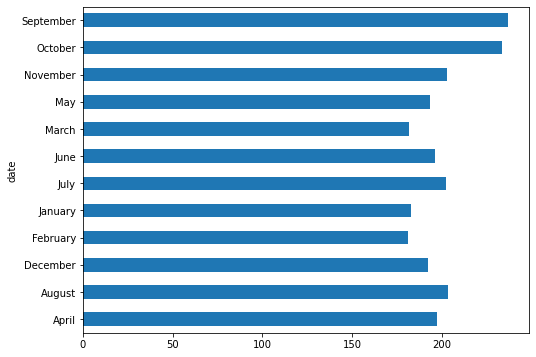

In [13]:
price_of_month.plot(kind="barh", figsize=(8, 6))

In [14]:
boston["week_day"] = boston["date"].dt.isocalendar().day

In [15]:
boston.head()

,listing_id,date,available,price,week_day
365,3075044,2017-08-22,t,65.0,2
366,3075044,2017-08-21,t,65.0,1
367,3075044,2017-08-20,t,65.0,7
368,3075044,2017-08-19,t,75.0,6
369,3075044,2017-08-18,t,75.0,5


In [16]:
price_of_weekday = boston.groupby(boston["week_day"])["price"].mean()
price_of_weekday

week_day
1    195.809561
2    195.173842
3    195.418228
4    198.073112
5    203.121167
6    203.408387
7    198.219764
Name: price, dtype: float64

([<matplotlib.axis.YTick at 0x22a2ad3dbb0>,
 [Text(0, 0, 'Mon.'),
  Text(0, 1, 'Tue.'),
  Text(0, 2, 'Wed.'),
  Text(0, 3, 'Thur.'),
  Text(0, 4, 'Fri.'),
  Text(0, 5, 'Sat.'),
  Text(0, 6, 'Sun.')])

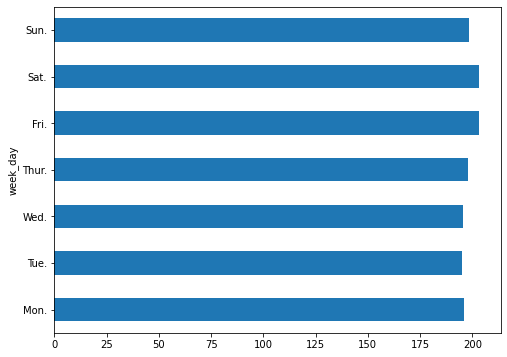

In [17]:
price_of_weekday.plot(kind="barh", figsize=(8, 6))
plt.yticks(ticks=range(7), labels=["Mon.", "Tue.", "Wed.", "Thur.", "Fri.", "Sat.", "Sun.",])

#### 离群点判断

In [18]:
price = boston.loc[(boston["price"]>0) & (boston["price"]<600)]
price

,listing_id,date,available,price,week_day
365,3075044,2017-08-22,t,65.0,2
366,3075044,2017-08-21,t,65.0,1
367,3075044,2017-08-20,t,65.0,7
368,3075044,2017-08-19,t,75.0,6
369,3075044,2017-08-18,t,75.0,5
...,...,...,...,...,...
1308875,14504422,2016-09-20,t,62.0,2
1308876,14504422,2016-09-19,t,62.0,1
1308877,14504422,2016-09-18,t,62.0,7
1308878,14504422,2016-09-17,t,62.0,6


(array([2.0000e+00, 2.3980e+03, 1.6942e+04, 3.3909e+04, 6.0093e+04,
        5.7695e+04, 4.6196e+04, 2.4626e+04, 3.1840e+04, 2.8582e+04,
        3.8326e+04, 2.9755e+04, 1.6783e+04, 3.5264e+04, 1.2730e+04,
        2.1396e+04, 2.5726e+04, 1.0050e+04, 1.3758e+04, 1.9014e+04,
        1.2348e+04, 1.0885e+04, 6.5170e+03, 1.7839e+04, 2.5300e+03,
        6.7000e+03, 9.7070e+03, 1.8500e+03, 4.8700e+03, 2.6020e+03,
        6.1470e+03, 2.4850e+03, 1.7120e+03, 7.8990e+03, 5.9500e+02,
        2.3490e+03, 2.3910e+03, 6.4400e+02, 2.1900e+03]),
 array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150, 165, 180,
        195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360, 375,
        390, 405, 420, 435, 450, 465, 480, 495, 510, 525, 540, 555, 570,
        585]),
 <BarContainer object of 39 artists>)

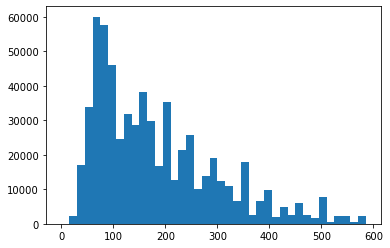

In [19]:
plt.hist(price.price, bins=np.arange(0, 600, 15))

In [22]:
listings = pd.read_csv("D:/datasets/Airbnb/listings.csv")
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.3


###### 用盒图来判断离群点 数据分布  
- 有三条横线：代表中位数达到 1/4  2/4  3/4 
- 3/4线 上面的点就代表离群点

<AxesSubplot:xlabel='room_type', ylabel='price'>

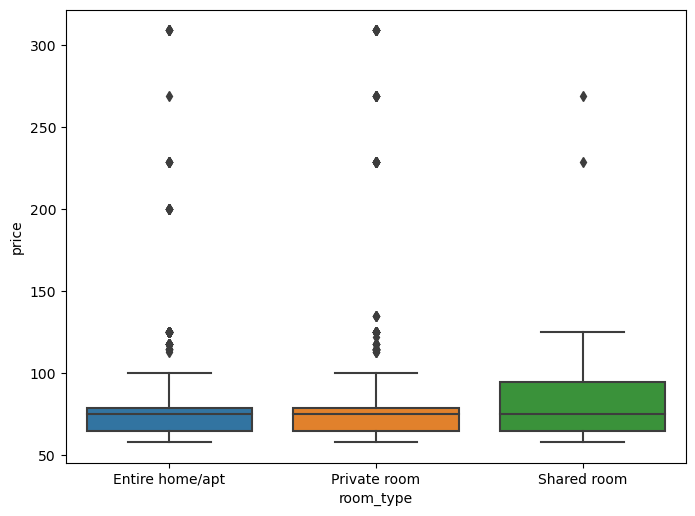

In [25]:
plt.figure(figsize=(8, 6), dpi=100)
sns.boxplot(x=listings.room_type, y=boston.price, data=price.price)